In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

def analyze_single_sample(sample):
    # Display instruction evolution
    def display_instruction_evolution(instruction_data):
        html = f"<h3>Original Instruction: {instruction_data['original_instruction']}</h3>"
        html += "<table><tr><th>Stage</th><th>Input Instruction</th><th>Final Evolved Instruction</th></tr>"
        
        for stage in instruction_data['stages']:
            html += f"<tr><td>{stage['stage']}</td><td>{stage['input_instruction']}</td><td>{stage['final_evolved_instruction']}</td></tr>"
        
        html += f"<tr><td>Final</td><td colspan='2'>{instruction_data['final_instruction']}</td></tr>"
        html += "</table>"
        
        display(HTML(html))
    
    display_instruction_evolution(sample)
    
    # Word count analysis
    def word_count(text):
        return len(text.split())
    
    stage_word_counts = {0: word_count(sample['original_instruction'])}
    for i, stage in enumerate(sample['stages']):
        stage_word_counts[i+1] = word_count(stage['final_evolved_instruction'])
    # stage_word_counts[len(sample['stages'])] = word_count(sample['final_instruction'])
    
    plt.figure(figsize=(10, 6))
    plt.plot(list(stage_word_counts.keys()), list(stage_word_counts.values()), marker='o')
    plt.title('Word Count of Instructions by Stage')
    plt.xlabel('Stage (0: Original, 0 to N-1: Intermediate, N: Final)')
    plt.ylabel('Word Count')
    plt.xticks(range(0, len(sample['stages']) + 1))
    plt.grid(True)
    plt.show()
    
    # Display methods used in each stage
    def display_methods(instruction_data):
        html = "<h3>Methods Used in Each Stage</h3>"
        html += "<table><tr><th>Stage</th><th>Method</th></tr>"
        
        for stage in instruction_data['stages']:
            html += f"<tr><td>{stage['stage']}</td><td>{stage['optimized_method']}...</td></tr>"
        
        html += "</table>"
        
        display(HTML(html))
    
    display_methods(sample)
    
    # Display statistics
    num_stages = len(sample['stages'])
    print(f"Number of stages: {num_stages}")
    
    # Display evolved instructions and feedbacks
    for i, stage in enumerate(sample['stages']):
        print(f"\nStage {i + 1}")
        print("Evolved Instructions:")
        for j, instruction in enumerate(stage['evolved_instructions']):
            print(f"  {j + 1}. {instruction}")
        print("\nFeedbacks:")
        for j, feedback in enumerate(stage['feedbacks']):
            print(f"  {j + 1}. {feedback}")

    # Display final instruction
    print(f"\nFinal Instruction: {sample['final_instruction']}")

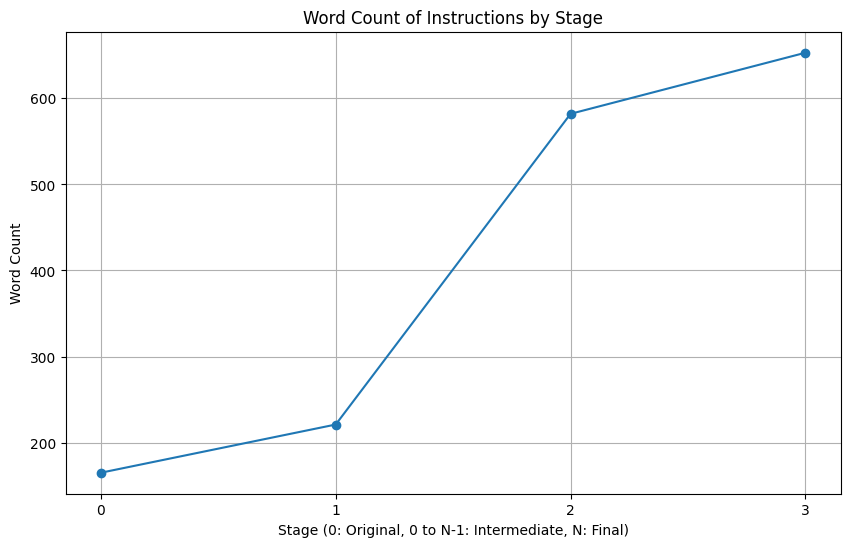

Number of stages: 3

Stage 1
Evolved Instructions:
  1. ```Optimized Instruction
Step 1:
#Methods List#
1. Introduce additional variables or calculations.
2. Specify the exact driving conditions for each fuel type.
3. Include a requirement for a detailed explanation of the calculation process.
4. Request the calculation of the percentage difference between the weighted average and advertised mileage.

Step 2:
#Plan#
1. Specify the driving conditions for each fuel type.
2. Add a requirement for a detailed explanation of the calculation process.
3. Request the calculation of the percentage difference between the weighted average and advertised mileage.

Step 3:
#Rewritten Instruction#
Pria bought a new car that advertised an estimated gas mileage of 35 miles per gallon with regular gasoline. The car has a 12-gallon tank. She wants to test the car's fuel efficiency under varying conditions and different fuel types. To do this, she fills her tank with 4 gallons of regular gasoline, 4 gallo

In [28]:
with open('/Users/qnguyen3/Downloads/the_tomb_evolved-3e-batch50_batch4_cont_1.json', 'r') as f:
    data = json.load(f)

analyze_single_sample(data[450])